# HW#3 Perceptron & Logistic Regression

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 Perceptron 및 Logstic regression 구현입니다.




#1. Perceptron Learning Algorithm
Perceptron은 Linearly separable data를 Classification 할 수 있는 알고리즘입니다. 이번 파트에서는 Perceptron을 한번 구현해 봅시다.

# 1.1 - Package import

먼저 과제에 필요한 package를 import 합니다.
- [numpy](www.numpy.org)는 파이썬에서 행렬 연산을 위한 핵심 라이브러리입니다.
- [matplotlib](http://matplotlib.org) 파이썬에서 plot을 위한 라이브러리입니다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

##1.2 - Linearly separable data generation
2차원의 Linearly separable data인 X와 Label Y를 만들고 plot해보세요. Lineary separable이라는 말은 직선을 경계로 나눌 수 있다는 뜻입니다.


1. 먼저 X를 만들어 봅시다. X는 2차원의 N개의 점으로 이루어져 있습니다.. 즉 X는 N x 2 차원의 행렬입니다. 본 문제에서는 $N=100$으로 가정합시다. `np.random.rand()` 함수를 이용하여 100 X 2 행렬인 X를 만들어 보세요.

$$X=\begin{bmatrix} x_1^{(1)}& x_2^{(1)}\\ x_1^{(2)}&x_2^{(2)} \\ \vdots&\vdots \\ x_1^{(N)}&x_2^{(N)}\end{bmatrix}$$


2. 이번에는 Label 정보를 가지고 있는 Y를 만들어보세요.  여기서는 $x_2=3x_1-1$이라는 선을 경계로 $x_2 > 3x_1-1$이면 1이라는 값을 갖고, 그렇지 않으면 -1이라는 값을 가지도록 합시다. N개의 data에 대한 라벨을 가지기 때문에 Y는 N x 1 차원의 행렬입니다. 이 문제에서는 100 x 1이 될 것입니다.

$$Y=\begin{bmatrix} y^{(1)}\\ y^{(2)}\\ \vdots\\ y^{(N)}\end{bmatrix}$$


**Exercise:** X와 Y를 만들고 출력해보세요.


In [0]:
### START CODE HERE ###
X= np.random.rand(100,2)
Y= np.empty((100,1))

for i in range(len(X)):
  if X[i][1] > (3*X[i][0] - 1) :
    Y[i] = 1 
  else : 
    Y[i] = -1

  
### END CODE HERE ###
assert X.shape==(100,2)
assert Y.shape==(100,1)

Text(0, 0.5, 'x2')

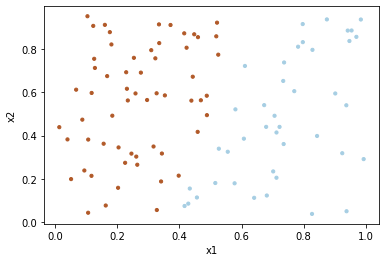

In [91]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=10, cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

##1.3 - Perceptron implementation
`perceptron()` 함수를 구현해봅시다. 
먼저 수업 시간에 배웠듯이 편의상 모든 X 데이터에 $x_0=1$이 추가되어 있는 X_ones를 만들고 우리가 찾아야할 weight 행렬을 $w$라고 정의합니다. 따라서 X_ones의 차원은 N x 3이 될 것이고 $w=[w_0, w_1, w_2]$가 될 것입니다.


perceptron은 다음과 같은 과정으로 weight를 찾아냅니다.

> for each training case

>&nbsp;&nbsp;&nbsp;&nbsp; $z^{(i)} = \mathbf{w}^T\mathbf{Xones}$

>&nbsp;&nbsp;&nbsp;&nbsp;if $z^{(i)}*y^{(i)} \leq 0$

>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{w} = \mathbf{w} + \mathbf{Xones}^{(i)} * y^{(i)}$

위 과정을 w가 변하지 않을 때까지 반복합니다. 본 과제에서는 편의상 충분히 큰 횟수인 100회를 반복하면 변하지 않는다고 가정하겠습니다.

**Exercise:** Perceptron 알고리즘 구현해보세요.


In [92]:
X_ones=np.concatenate((np.ones((100,1)),X), axis=1)
w= np.zeros(X_ones.shape[1])
print("shape of w :",w.shape[0])

shape of w : 3


In [0]:
# epoch을 input으로 하여 epoch을 조절하며 그래프 비교
def perceptron(X,Y,epochs):
  X_ones=np.concatenate((np.ones((100,1)),X), axis=1)
  w= np.zeros(X_ones.shape[1])
  X_ones = np.transpose(X_ones)
  print("shape of w :",w.shape)
  print(type(w))
  print("shape of X_ones :", X_ones.shape)

  iteration = 100
  for ep in range(epochs):
   for i in range(iteration): # datasample수 만큼 iteration
    ### START CODE HERE ###
      z = np.dot(w.T,X_ones[:,i])
      """
      shape of w : (3,)
      shape of X_ones : (100, 3)  -> (3,100)

      z(i) = w.T*X_ones[i번째 sample]
      z(i) = scalar
      """
      if z*Y[i] <= 0 :
        w += Y[i]*X_ones[:,i]

      
    ### END CODE HERE ###

    #print("shape of z : ",z.shape)
  return w


In [186]:
w=perceptron(X,Y,50)
assert w.shape[0]==3
print(w)


shape of w : (3,)
<class 'numpy.ndarray'>
shape of X_ones : (3, 100)
[ 2.         -5.31406015  1.63538617]


##1.4 - Visualization
우리가 찾은 weight가 정말 data를 잘 구분하는지 살펴보겠습니다.
$x_0=1$이기 때문에 prediction인 $z$는 다음과 같은 식을 만족합니다.

$$z=w_0x_0+w_1x_1+w_2x_2=w_0+w_1x_1+w_2x_2$$

이 때 z=0을 경계로 데이터가 나누어지기 때문에 $(x_1,x_2)$은 다음과 같은 식을 만족합니다.

$$x_2 = -\frac{w_1}{w_2}x_1-\frac{w_0}{w_2} $$


아래 코드를 실행하여 데이터가 잘 나누어지는지 살펴보세요.

Text(0, 0.5, 'x2')

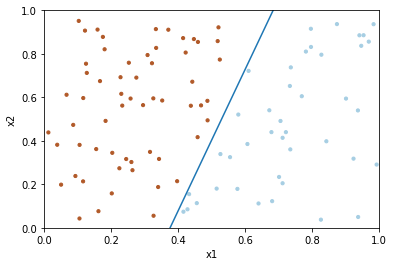

In [187]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=10, cmap=plt.cm.Paired)
plt.plot([0,1],[-w[0]/w[2],-w[0]/w[2]-w[1]/w[2]])
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('x1')
plt.ylabel('x2')

##1.5 (optional) Multi-class perceptron

만약 class가 여러개일 때 perceptron으로 분류하려면 어떻게 해야 할까요?
예를 들어 class label이 3가지인 경우, 즉 1,2,3인 경우를 생각해봅시다.

첫번째 방법은 one vs rest 방법입니다.

*   1번라벨 vs 2번라벨과 3번라벨  -> Perceptron -> Line1
*   2번라벨 vs 1번라벨과 3번라벨  -> Perceptron -> Line2
*   3번라벨 vs 1번라벨과 2번라벨  -> Perceptron -> Line3

이렇게 Line 3개를 찾아서 그으면 3개의 클래스를 구분할 수 있습니다. 

두번째 방법으로는 one vs one 방법입니다.

*   1번라벨 vs 2번라벨  -> Perceptron -> Line1
*   2번라벨 vs 3번라벨  -> Perceptron -> Line2
*   3번라벨 vs 1번라벨  -> Perceptron -> Line3

이렇게 해서도 Line 3개를 찾을 수 있습니다.
Label이 3개인 데이터를 만들어서 perceptron을 실행하여 데이터를 분류하고 plot해보세요.


#2. Logistic Regression
지난번 Linear regression을 구현했던 것처럼 이번에는 Logistic regression을 구현해봅시다.

## 2.1 Data generation

Logistic regression을 위한 데이터를 생성해봅시다. x가 5보다 작을때는 y 값이 0, 그렇지 않으면 y=1이 되도록 y를 만들어보세요. x의 데이터가 100개이므로 y의 shape가 (1,100)이 되도록 해보세요.

In [60]:
# 데이터 생성, x:input, y:target
# y는 x가 5보다 작을때는 0, 5보다 클때는 1

x = np.array([np.linspace(0, 10, 100)]) # 0부터 10까지 100개의 데이터를 생성합니다.

x[0][99]

10.0

The shape of input data x: (1, 100)
The shape of target data y: (1, 100)


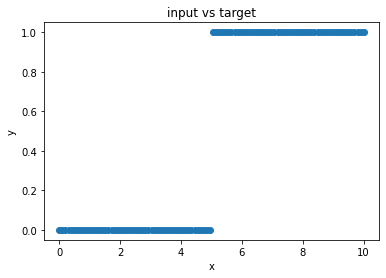

In [61]:
# 데이터 생성, x:input, y:target
# y는 x가 5보다 작을때는 0, 5보다 클때는 1

x = np.array([np.linspace(0, 10, 100)]) # 0부터 10까지 100개의 데이터를 생성합니다.

### START CODE HERE ###
#y = np.zeros(shape=(1,100))
y = np.empty((1,100))
for i in range(len(x[0])):
  if x[0][i] < 5 :
    y[0][i] = 0
  else : 
    y[0][i] = 1

### END CODE HERE ###

print ("The shape of input data x: " + str(x.shape))
print ("The shape of target data y: " + str(y.shape))

assert x.shape == (1,100)
assert y.shape == (1,100)

plt.scatter(x, y)
plt.title('input vs target')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##2.2 Sigmoid function
`sigmoid()` 함수를 구현해보세요. S자 형태로 나타나는 이 곡선은 다음과 같은 식을 만족합니다.

$$sigmoid(z) = \frac{1}{1 + e^{-z}}$$

np.exp()를 이용하여 만들어보세요.

Text(0, 0.5, 'sigmoiod(z)')

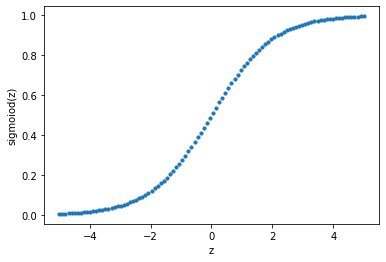

In [62]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + (np.exp(-z)))
    
    ### END CODE HERE ###
    
    return s

z = np.array([np.linspace(-5, 5, 100)]) # 0부터 10까지 100개의 데이터를 생성합니다.
plt.scatter(z, sigmoid(z), s=10, cmap=plt.cm.Paired)
plt.xlabel('z')
plt.ylabel('sigmoiod(z)')

In [63]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

sigmoid([0, 2]) = [0.5        0.88079708]

## 2.3 - General Architecture of the learning algorithm ##

Logistic regression을 구하기 위해서 우리의 hypothesis는 다음과 같은 식을 만족합니다.

$$z^{(i)} = w x^{(i)} + b \tag{1}$$
$$\hat y^{(i)}=sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(\hat y^{(i)}, y^{(i)}) =  - y^{(i)}  \log(\hat y^{(i)}) - (1-y^{(i)} )  \log(1-\hat y^{(i)})\tag{3}$$

마지막으로 전체 데이터 m개에 대한 cost function은 (4)과 같이 정의됩니다.

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat y^{(i)}, y^{(i)})\tag{4}$$

최종적으로 이 cost function의 값을 최소화하는 $w$와 $b$를 찾는 것이 우리의 목표가 되는 것입니다.


## 2.4 - Gradient descent algorithm ## 
Gradient descent algorithm은 다음과 같은 단계로 구현합니다.

1. Parameter 초기화 `initialize_with_zeros()`
2. Loop (최적화 과정): `optimize()`
    - 현재 cost 계산(forward propagation) 및 현재 gradient를 계산 (backward propagation) : `propagate()`
    - Parameter 업데이트(gradient descent)

이 모든 과정을 합쳐서 `model()` 함수로 구현합니다.

### 2.4.1 - Parameter 초기화
**Exercise:** 아래 Parameter 초기화 함수를 구현하세요. $w$의 경우 0으로 이루어진 벡터이고 $b$의 경우 스칼라값 0으로 초기화하세요. np.zeros() 함수를 참고하세요.

In [0]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ###
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [65]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


w = [[0.]\
     [0.]]

b = 0

### 2.4.2 - Forward and Backward propagation
**Exercise:** cost값 및 gradient를 계산하는 `propagate()` 함수를 구현하세요.

**Hints**:

Forward Propagation:
- X를 인수로 받는다.
- (1), (2), (3)을 합쳐서 전개하면 다음과 같은 cost function 식이 나온다.
$$ J = -\frac{1}{m} \sum_{i=1}^m (y^{(i)}  \log(\hat y^{(i)}) + (1-y^{(i)} )  \log(1-\hat y^{(i)}))\tag{5}$$

Backward Propagation:
- w와 b의 gradient를 행렬 형태로 쓰면 다음과 같다.

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(w^TX+b-Y)^T\tag{6}$$
\
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \ np.sum [w^TX+b-Y]\tag{7}$$


In [0]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of size (dim, number of examples)
    Y -- true "label" vector (containing 0 or 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ###
    A = sigmoid(np.dot(w.T,X)+b) # compute activation
    cost = -1 / m * np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis = 1, keepdims = True)
     
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ###
    dw = 1 / m * np.dot(X,(A-Y).T)
    db = 1 / m * np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [67]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

dw = [[0.99845601]
 [2.39507239]]

db = 0.001455578136784208

cost = 5.801545319394553

### 2.4.3 - Optimization
현재 parameter에 새로운 parameter를 업데이트하는 함수 `optimize()` 함수를 구현하세요.

**Exercise:** 우리의 parameter $w$와 $b$를 업데이트하는 식을 구현해야 합니다. paramter를 $\theta$라고 할 때, 업데이트 규칙은 $ \theta = \theta - \alpha \text{ } d\theta$로 정의됩니다. 이 때 $\alpha$를 learning rate라고 합니다.

In [0]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of shape (dim, number of examples)
    Y -- true "label" vector (containing 0 or 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db 
        ### END CODE HERE ###
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [69]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


**Expected Output**: 

w = [[0.19033591]

 [0.12259159]]

b = 1.9253598300845747

dw = [[0.67752042]

 [1.41625495]]
 
db = 0.21919450454067657

## 2.5 - Merge all functions into a model ##

**Exercise:** 최종적으로 앞서 구한 함수들을 이용하여 model 함수를 구현하세요.

In [0]:
# GRADED FUNCTION: model

def model(X, Y, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X -- training set represented by a numpy array of shape (dim, m_train)
    Y -- training labels represented by a numpy array (vector) of shape (1, m_train)
    
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X.shape[0])

    # Gradient descent
    parameters, grads, costs =  optimize(w, b, X, Y, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
     
    ### END CODE HERE ###
  
    d = {"costs": costs,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [71]:
d = model(x, y, num_iterations = 1000, learning_rate = 1, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.126975
Cost after iteration 200: 0.102019
Cost after iteration 300: 0.090061
Cost after iteration 400: 0.082223
Cost after iteration 500: 0.076534
Cost after iteration 600: 0.072140
Cost after iteration 700: 0.068601
Cost after iteration 800: 0.065663
Cost after iteration 900: 0.063167


**Expected Output**: 

Cost after iteration 0: 0.693147

Cost after iteration 100: 0.126975

Cost after iteration 200: 0.102019

Cost after iteration 300: 0.090061

Cost after iteration 400: 0.082223

Cost after iteration 500: 0.076534

Cost after iteration 600: 0.072140

Cost after iteration 700: 0.068601

Cost after iteration 800: 0.065663

Cost after iteration 900: 0.063167



## 2.6 - Visualization ##
Learning이 진행될수록 cost가 어떻게 나타나는지 확인해보세요.


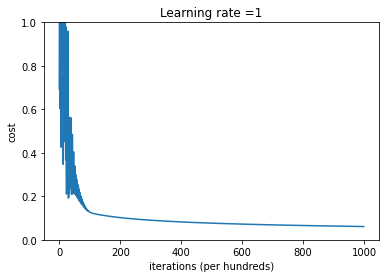

In [72]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.ylim((0,1))
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Gradient descent를 통해 추정한 직선을 plot하여 Logistic regression이 잘 되는지 확인해보세요.

w = [[2.67577818]]
b = -13.259904221073695


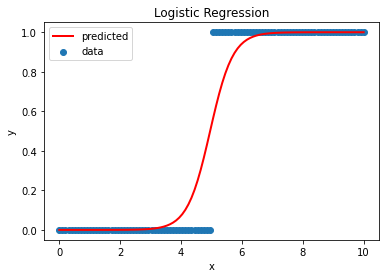

In [73]:
print ("w = " + str(d["w"]))
print ("b = " + str(d["b"]))

y_hat = sigmoid(np.dot(np.transpose(d["w"]),x)+d["b"])
plt.scatter(x, y,label='data')
plt.plot(np.transpose(x),np.transpose(y_hat), color='red', linewidth=2, label='predicted')
plt.title('Logistic Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [197]:
d_1 = model(x, y, num_iterations = 1000, learning_rate = 3, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.167342
Cost after iteration 200: 0.052939
Cost after iteration 300: 0.040553
Cost after iteration 400: 0.039416
Cost after iteration 500: 0.038396
Cost after iteration 600: 0.037472
Cost after iteration 700: 0.036630
Cost after iteration 800: 0.035858
Cost after iteration 900: 0.035147


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


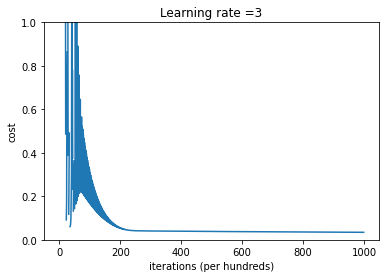

In [198]:
# Plot learning curve (with costs)
costs_1 = np.squeeze(d_1['costs'])
plt.plot(costs_1)
plt.ylabel('cost')
plt.ylim((0,1))
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_1["learning_rate"]))
plt.show()

w = [[4.70160674]]
b = -23.4402659816888


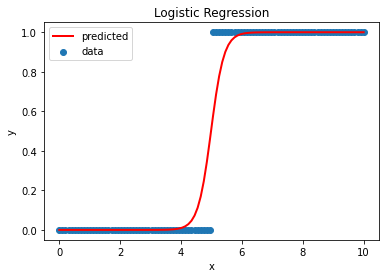

In [199]:
print ("w = " + str(d_1["w"]))
print ("b = " + str(d_1["b"]))

y_hat = sigmoid(np.dot(np.transpose(d_1["w"]),x)+d_1["b"])
plt.scatter(x, y,label='data')
plt.plot(np.transpose(x),np.transpose(y_hat), color='red', linewidth=2, label='predicted')
plt.title('Logistic Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()